<a href="https://colab.research.google.com/github/IBeliveInMagic/Covid_Dados/blob/main/Dados_Covid_CO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [1]:
import requests
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importação e configuração para o padrão Seaborn
import seaborn as sns
sns.set()

# **Carregar os dados**



In [2]:
# Motando o drive para importar os datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Carregando os dados parte 1 estado de Goiás 
df_GO = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_estados/Dados-Part1-GO.csv',sep=';',low_memory=False)
df_MS = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_estados/Dados-Part1-MS.csv',sep=';',low_memory=False)
df_MT = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_estados/Dados-Part1=MT.csv',sep=';',low_memory=False)
df_DF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_estados/Dados-Part1-DF.csv',sep=';',low_memory=False)

# **Tratamento dos dados - Goiás**

> Estado de Goiás



IBGE - População estimada de Goiás

7.206.589
pessoas
   [2021] : https://www.ibge.gov.br/cidades-e-estados/go.html

In [4]:
# mostra os nomes das colunas
df_GO.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

In [5]:
# Selecionar 3 colunas para a primeira análise
df_GO1 = df_GO.iloc[: , [0,28,30]]
df_GO1.head()

,document_id,vacina_descricao_dose,vacina_nome
0,1ab7f230-bff6-4e3b-972e-fc8e075c61c3-i0b0,2ª Dose,COVID-19 PFIZER - COMIRNATY
1,11812484-aafd-4025-941b-89980899edfd-i0b0,Reforço,COVID-19 PFIZER - COMIRNATY
2,1abef6b1-d0ca-469d-abdc-cb3a4b33fe6e-i0b0,Reforço,COVID-19 PFIZER - COMIRNATY
3,1186cfb4-f569-4960-881a-ff0045e4a7dc-i0b0,1ª Dose,COVID-19 PFIZER - COMIRNATY
4,1ac2e3b7-a6a7-4695-9ae2-e0e32ddb68d9-i0b0,Reforço,COVID-19 PFIZER - COMIRNATY


In [6]:
df_GO1.groupby(['vacina_descricao_dose']).count()['document_id']

vacina_descricao_dose
1ª Dose                1926585
1ª Dose Revacinação          1
2ª Dose                1669493
2º Reforço              144185
3ª Dose                      1
3º Reforço                 256
Dose                     54263
Dose Adicional           58903
Dose Inicial                 1
Reforço                 793509
Name: document_id, dtype: int64

In [7]:
# Selecionar 7 colunas para a segunda análise
df_GO2 = df_GO.iloc[: , [0,2,20,21,22,23,30]]
df_GO2.head()

,document_id,paciente_idade,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_nome
0,1ab7f230-bff6-4e3b-972e-fc8e075c61c3-i0b0,47.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
1,11812484-aafd-4025-941b-89980899edfd-i0b0,64.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
2,1abef6b1-d0ca-469d-abdc-cb3a4b33fe6e-i0b0,48.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
3,1186cfb4-f569-4960-881a-ff0045e4a7dc-i0b0,19.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
4,1ac2e3b7-a6a7-4695-9ae2-e0e32ddb68d9-i0b0,61.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY


In [8]:
# Selecionar 7 colunas para a segunda análise
df_GO3 = df_GO.iloc[: , [27,28]]
df_GO3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-09-28,2ª Dose
1,2021-12-07,Reforço
2,2022-02-01,Reforço
3,2021-08-23,1ª Dose
4,2021-12-20,Reforço


In [9]:
#converter a coluna vacina_dataAplicacao para o tipo datetime
df_GO3[['vacina_dataAplicacao']] = df_GO3[['vacina_dataAplicacao']].apply(pd.to_datetime)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
#Confirmando se trocou de tipo
df_GO3.dtypes

vacina_dataAplicacao     datetime64[ns]
vacina_descricao_dose            object
dtype: object

In [11]:
df_GO3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-09-28,2ª Dose
1,2021-12-07,Reforço
2,2022-02-01,Reforço
3,2021-08-23,1ª Dose
4,2021-12-20,Reforço


In [12]:
# Ordenando as vacinas pela data de aplicação , em ordem crescente de data
df_GO3.sort_values(by=['vacina_dataAplicacao'])

,vacina_dataAplicacao,vacina_descricao_dose
426115,2021-01-01,1ª Dose
3637039,2021-01-12,1ª Dose
1713523,2021-01-12,1ª Dose
698274,2021-01-12,1ª Dose
417987,2021-01-12,1ª Dose
...,...,...
940315,2022-06-25,2º Reforço
4595137,2022-06-25,2º Reforço
19300,2022-06-25,2º Reforço
1674295,2022-06-25,3º Reforço


Nas próximas duas células filtramos por mês as vacinas aplicadas no ano de 2021 e salvamos em diferentes DataFrames

In [13]:
df_GO3_mes1 = df_GO3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2021-01-31'")
df_GO3_mes2 = df_GO3.query(" vacina_dataAplicacao >= '2021-02-01' and vacina_dataAplicacao <= '2021-02-28'")
df_GO3_mes3 = df_GO3.query(" vacina_dataAplicacao >= '2021-03-01' and vacina_dataAplicacao <= '2021-03-31'")
df_GO3_mes4 = df_GO3.query(" vacina_dataAplicacao >= '2021-04-01' and vacina_dataAplicacao <= '2021-04-30'")
df_GO3_mes5 = df_GO3.query(" vacina_dataAplicacao >= '2021-05-01' and vacina_dataAplicacao <= '2021-05-31'")
df_GO3_mes6 = df_GO3.query(" vacina_dataAplicacao >= '2021-06-01' and vacina_dataAplicacao <= '2021-06-30'")

In [14]:
df_GO3_mes7 = df_GO3.query(" vacina_dataAplicacao >= '2021-07-01' and vacina_dataAplicacao <= '2021-07-31'")
df_GO3_mes8 = df_GO3.query(" vacina_dataAplicacao >= '2021-08-01' and vacina_dataAplicacao <= '2021-08-31'")
df_GO3_mes9 = df_GO3.query(" vacina_dataAplicacao >= '2021-09-01' and vacina_dataAplicacao <= '2021-09-30'")
df_GO3_mes10 = df_GO3.query(" vacina_dataAplicacao >= '2021-10-01' and vacina_dataAplicacao <= '2021-10-31'")
df_GO3_mes11 = df_GO3.query(" vacina_dataAplicacao >= '2021-11-01' and vacina_dataAplicacao <= '2021-11-30'")
df_GO3_mes12 = df_GO3.query(" vacina_dataAplicacao >= '2021-12-01' and vacina_dataAplicacao <= '2021-12-31'")

Agora agrupamos pela descrição de dose para analisarmos quantas pessoas receberam 1º Dose, 2º Dose , Dose Adicional e Reforço por mês do ano de 2021

In [15]:
df_GO3_mes1.groupby('vacina_descricao_dose').count()

,vacina_dataAplicacao
vacina_descricao_dose,
1ª Dose,31799
2ª Dose,55
Dose Adicional,3
Reforço,2


In [16]:
df_GO3_mes1count = df_GO3_mes1.groupby('vacina_descricao_dose').count()
df_GO3_mes2count = df_GO3_mes2.groupby('vacina_descricao_dose').count()
df_GO3_mes3count = df_GO3_mes3.groupby('vacina_descricao_dose').count()
df_GO3_mes4count = df_GO3_mes4.groupby('vacina_descricao_dose').count()
df_GO3_mes5count = df_GO3_mes5.groupby('vacina_descricao_dose').count()
df_GO3_mes6count = df_GO3_mes6.groupby('vacina_descricao_dose').count()

In [17]:
df_GO3_mes7count = df_GO3_mes7.groupby('vacina_descricao_dose').count()
df_GO3_mes8count = df_GO3_mes8.groupby('vacina_descricao_dose').count()
df_GO3_mes9count = df_GO3_mes9.groupby('vacina_descricao_dose').count()
df_GO3_mes10count = df_GO3_mes10.groupby('vacina_descricao_dose').count()
df_GO3_mes11count = df_GO3_mes11.groupby('vacina_descricao_dose').count()
df_GO3_mes12count = df_GO3_mes12.groupby('vacina_descricao_dose').count()

In [18]:
Vacina_Mes_1 = pd.merge(df_GO3_mes1count, df_GO3_mes2count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes1', '_mes2'))
Vacina_Mes_2 = pd.merge(Vacina_Mes_1, df_GO3_mes3count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes2', '_mes3'))
Vacina_Mes_3 = pd.merge(Vacina_Mes_2, df_GO3_mes4count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes3', '_mes4'))
Vacina_Mes_4 = pd.merge(Vacina_Mes_3, df_GO3_mes5count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes4', '_mes5'))
Vacina_Mes_5 = pd.merge(Vacina_Mes_4, df_GO3_mes6count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes5', '_mes6'))
Vacina_Mes_6 = pd.merge(Vacina_Mes_5, df_GO3_mes7count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes6', '_mes7'))

In [19]:
Vacina_Mes_7 = pd.merge(Vacina_Mes_6, df_GO3_mes8count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes7', '_mes8'))
Vacina_Mes_8 = pd.merge(Vacina_Mes_7, df_GO3_mes9count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes8', '_mes9'))
Vacina_Mes_9 = pd.merge(Vacina_Mes_8, df_GO3_mes10count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes9', '_mes10'))
Vacina_Mes_10 = pd.merge(Vacina_Mes_9, df_GO3_mes11count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes10', '_mes11'))
Vacina_Mes_11 = pd.merge(Vacina_Mes_10, df_GO3_mes12count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes11', '_mes12'))

In [20]:
#Imprimir o DataFrame Vacina_Mes_11 que corresponde todos os os meses juntos
Vacina_Mes_11

,vacina_dataAplicacao_mes1,vacina_dataAplicacao_mes2,vacina_dataAplicacao_mes3,vacina_dataAplicacao_mes4,vacina_dataAplicacao_mes5,vacina_dataAplicacao_mes6,vacina_dataAplicacao_mes7,vacina_dataAplicacao_mes8,vacina_dataAplicacao_mes9,vacina_dataAplicacao_mes10,vacina_dataAplicacao_mes11,vacina_dataAplicacao_mes12
vacina_descricao_dose,,,,,,,,,,,,
1ª Dose,31799,43819,141225,112430.0,183179.0,294748,265555,375199,174715,84729,40764,24276
2ª Dose,55,23494,29754,129382.0,43455.0,22604,134216,220690,284021,232773,242796,130431
Dose Adicional,3,5,5,NaN,NaN,3,6,4,1412,4728,2016,6403
Reforço,2,4,6,3.0,3.0,4,19,52,9873,76418,69269,109428


In [21]:
# Transposta do DataFrame Vacina_Mes_11
Vacina_Mes_11.T

vacina_descricao_dose,1ª Dose,2ª Dose,Dose Adicional,Reforço
vacina_dataAplicacao_mes1,31799.0,55.0,3.0,2.0
vacina_dataAplicacao_mes2,43819.0,23494.0,5.0,4.0
vacina_dataAplicacao_mes3,141225.0,29754.0,5.0,6.0
vacina_dataAplicacao_mes4,112430.0,129382.0,NaN,3.0
vacina_dataAplicacao_mes5,183179.0,43455.0,NaN,3.0
vacina_dataAplicacao_mes6,294748.0,22604.0,3.0,4.0
vacina_dataAplicacao_mes7,265555.0,134216.0,6.0,19.0
vacina_dataAplicacao_mes8,375199.0,220690.0,4.0,52.0
vacina_dataAplicacao_mes9,174715.0,284021.0,1412.0,9873.0
vacina_dataAplicacao_mes10,84729.0,232773.0,4728.0,76418.0


In [22]:
#Susbtituir os valores NaN por 0
GO_Count_Mes_Dose = Vacina_Mes_11.T.replace(np.nan,0)

Substituir vacina_dataAplicacao_mes1 por VA1

In [23]:
GO_Count_Mes_Dose.index = ["VA1","VA2","VA3","VA4","VA5","VA6","VA7","VA8","VA9","VA10","VA11","VA12"]

In [24]:
GO_Count_Mes = df_GO3.groupby('vacina_dataAplicacao').count()

# **Tratamento dos dados - Mato Grosso**

> Estado de Mato Grosso



IBGE - População estimada de Mato Grosso

3.567.234
pessoas
   [2021] : https://www.ibge.gov.br/cidades-e-estados/mt.html

In [25]:
# mostra os nomes das colunas
df_MT.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

In [26]:
# Selecionar 3 colunas para a primeira análise
df_MT1 = df_MT.iloc[: , [0,28,30]]
df_MT1.head()

,document_id,vacina_descricao_dose,vacina_nome
0,1900678f-fe57-4589-a764-26899a85df67-i0b0,2ª Dose,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
1,1116eab8-2562-4134-906e-6b787a2bc211-i0b0,1ª Dose,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
2,19016650-cd16-4610-aa70-435e73dd0e49-i0b0,1ª Dose,COVID-19 PFIZER - COMIRNATY
3,1134c1f4-444c-457f-9f3f-92fac214dd92-i0b0,1ª Dose,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
4,1905de05-c391-4dc3-abe6-13f404275d21-i0b0,Reforço,COVID-19 SINOVAC/BUTANTAN - CORONAVAC


In [27]:
df_MT1.groupby(['vacina_descricao_dose']).count()['document_id']

vacina_descricao_dose
1ª Dose                924849
1ª Dose Revacinação        67
1º Reforço                 25
2ª Dose                785579
2ª Dose Revacinação         3
2º Reforço              39965
3ª Dose                  1631
3º Reforço                214
4ª Dose                    73
Dose                    31898
Dose Adicional          27973
Dose Inicial                1
Reforço                309999
Única                      64
Name: document_id, dtype: int64

In [28]:
# Selecionar 7 colunas para a segunda análise
df_MT2 = df_MT.iloc[: , [0,2,20,21,22,23,30]]
df_MT2.head()

,document_id,paciente_idade,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_nome
0,1900678f-fe57-4589-a764-26899a85df67-i0b0,76.0,204.0,Pessoas de 75 a 79 anos,2.0,Faixa Etária,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
1,1116eab8-2562-4134-906e-6b787a2bc211-i0b0,25.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
2,19016650-cd16-4610-aa70-435e73dd0e49-i0b0,19.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
3,1134c1f4-444c-457f-9f3f-92fac214dd92-i0b0,25.0,920.0,Recepcionista,9.0,Trabalhadores de Saúde,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
4,1905de05-c391-4dc3-abe6-13f404275d21-i0b0,13.0,206.0,Pessoas de 12 a 17 anos,2.0,Faixa Etária,COVID-19 SINOVAC/BUTANTAN - CORONAVAC


In [29]:
# Selecionar 7 colunas para a segunda análise
df_MT3 = df_MT.iloc[: , [27,28]]
df_MT3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-04-14,2ª Dose
1,2021-08-03,1ª Dose
2,2021-09-22,1ª Dose
3,2021-01-27,1ª Dose
4,2022-06-10,Reforço


In [30]:
#converter a coluna vacina_dataAplicacao para o tipo datetime
df_MT3[['vacina_dataAplicacao']] = df_MT3[['vacina_dataAplicacao']].apply(pd.to_datetime)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
#Confirmando se trocou de tipo
df_MT3.dtypes

vacina_dataAplicacao     datetime64[ns]
vacina_descricao_dose            object
dtype: object

In [32]:
df_MT3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-04-14,2ª Dose
1,2021-08-03,1ª Dose
2,2021-09-22,1ª Dose
3,2021-01-27,1ª Dose
4,2022-06-10,Reforço


In [33]:
# Ordenando as vacinas pela data de aplicação , em ordem crescente de data
df_MT3.sort_values(by=['vacina_dataAplicacao'])

,vacina_dataAplicacao,vacina_descricao_dose
2101031,1998-03-19,1ª Dose
1114569,1998-06-26,1ª Dose
1590843,2012-10-18,2ª Dose
983935,2020-11-17,Única
1292158,2020-11-18,Única
...,...,...
1717862,2022-06-25,2º Reforço
32385,2022-06-25,2ª Dose
1482202,2022-06-25,1ª Dose
73639,2022-06-25,Reforço


Nas próximas duas células filtramos por mês as vacinas aplicadas no ano de 2021 e salvamos em diferentes DataFrames

In [34]:
df_MT3_mes1 = df_MT3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2021-01-31'")
df_MT3_mes2 = df_MT3.query(" vacina_dataAplicacao >= '2021-02-01' and vacina_dataAplicacao <= '2021-02-28'")
df_MT3_mes3 = df_MT3.query(" vacina_dataAplicacao >= '2021-03-01' and vacina_dataAplicacao <= '2021-03-31'")
df_MT3_mes4 = df_MT3.query(" vacina_dataAplicacao >= '2021-04-01' and vacina_dataAplicacao <= '2021-04-30'")
df_MT3_mes5 = df_MT3.query(" vacina_dataAplicacao >= '2021-05-01' and vacina_dataAplicacao <= '2021-05-31'")
df_MT3_mes6 = df_MT3.query(" vacina_dataAplicacao >= '2021-06-01' and vacina_dataAplicacao <= '2021-06-30'")

In [35]:
df_MT3_mes7 = df_MT3.query(" vacina_dataAplicacao >= '2021-07-01' and vacina_dataAplicacao <= '2021-07-31'")
df_MT3_mes8 = df_MT3.query(" vacina_dataAplicacao >= '2021-08-01' and vacina_dataAplicacao <= '2021-08-31'")
df_MT3_mes9 = df_MT3.query(" vacina_dataAplicacao >= '2021-09-01' and vacina_dataAplicacao <= '2021-09-30'")
df_MT3_mes10 = df_MT3.query(" vacina_dataAplicacao >= '2021-10-01' and vacina_dataAplicacao <= '2021-10-31'")
df_MT3_mes11 = df_MT3.query(" vacina_dataAplicacao >= '2021-11-01' and vacina_dataAplicacao <= '2021-11-30'")
df_MT3_mes12 = df_MT3.query(" vacina_dataAplicacao >= '2021-12-01' and vacina_dataAplicacao <= '2021-12-31'")

Agora agrupamos pela descrição de dose para analisarmos quantas pessoas receberam 1º Dose, 2º Dose , Dose Adicional e Reforço por mês do ano de 2021

In [36]:
df_MT3_mes1.groupby('vacina_descricao_dose').count()

,vacina_dataAplicacao
vacina_descricao_dose,
1ª Dose,16415
2ª Dose,24
Dose,1
Dose Adicional,3
Reforço,16


In [37]:
df_MT3_mes1count = df_MT3_mes1.groupby('vacina_descricao_dose').count()
df_MT3_mes2count = df_MT3_mes2.groupby('vacina_descricao_dose').count()
df_MT3_mes3count = df_MT3_mes3.groupby('vacina_descricao_dose').count()
df_MT3_mes4count = df_MT3_mes4.groupby('vacina_descricao_dose').count()
df_MT3_mes5count = df_MT3_mes5.groupby('vacina_descricao_dose').count()
df_MT3_mes6count = df_MT3_mes6.groupby('vacina_descricao_dose').count()

In [38]:
df_MT3_mes7count = df_MT3_mes7.groupby('vacina_descricao_dose').count()
df_MT3_mes8count = df_MT3_mes8.groupby('vacina_descricao_dose').count()
df_MT3_mes9count = df_MT3_mes9.groupby('vacina_descricao_dose').count()
df_MT3_mes10count = df_MT3_mes10.groupby('vacina_descricao_dose').count()
df_MT3_mes11count = df_MT3_mes11.groupby('vacina_descricao_dose').count()
df_MT3_mes12count = df_MT3_mes12.groupby('vacina_descricao_dose').count()

In [39]:
Vacina_Mes_1 = pd.merge(df_MT3_mes1count, df_MT3_mes2count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes1', '_mes2'))
Vacina_Mes_2 = pd.merge(Vacina_Mes_1, df_MT3_mes3count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes2', '_mes3'))
Vacina_Mes_3 = pd.merge(Vacina_Mes_2, df_MT3_mes4count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes3', '_mes4'))
Vacina_Mes_4 = pd.merge(Vacina_Mes_3, df_MT3_mes5count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes4', '_mes5'))
Vacina_Mes_5 = pd.merge(Vacina_Mes_4, df_MT3_mes6count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes5', '_mes6'))
Vacina_Mes_6 = pd.merge(Vacina_Mes_5, df_MT3_mes7count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes6', '_mes7'))

In [40]:
Vacina_Mes_7 = pd.merge(Vacina_Mes_6, df_MT3_mes8count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes7', '_mes8'))
Vacina_Mes_8 = pd.merge(Vacina_Mes_7, df_MT3_mes9count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes8', '_mes9'))
Vacina_Mes_9 = pd.merge(Vacina_Mes_8, df_MT3_mes10count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes9', '_mes10'))
Vacina_Mes_10 = pd.merge(Vacina_Mes_9, df_MT3_mes11count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes10', '_mes11'))
Vacina_Mes_11 = pd.merge(Vacina_Mes_10, df_MT3_mes12count, how = 'left', on = 'vacina_descricao_dose',suffixes=('_mes11', '_mes12'))

In [41]:
#Imprimir o DataFrame Vacina_Mes_11 que corresponde todos os os meses juntos
Vacina_Mes_11

,vacina_dataAplicacao_mes1,vacina_dataAplicacao_mes2,vacina_dataAplicacao_mes3,vacina_dataAplicacao_mes4,vacina_dataAplicacao_mes5,vacina_dataAplicacao_mes6,vacina_dataAplicacao_mes7,vacina_dataAplicacao_mes8,vacina_dataAplicacao_mes9,vacina_dataAplicacao_mes10,vacina_dataAplicacao_mes11,vacina_dataAplicacao_mes12
vacina_descricao_dose,,,,,,,,,,,,
1ª Dose,16415,16552.0,40132,71812,70844.0,124153,176063,157800,81581,65317,23001,13279
2ª Dose,24,14781.0,11206,43549,31228.0,10582,51419,92571,144858,149161,96726,62404
Dose,1,NaN,3,1,NaN,2493,26460,1038,989,73,3,21
Dose Adicional,3,6.0,2,1,NaN,3,3,1,421,1949,1425,3019
Reforço,16,2.0,5,3,2.0,2,2,8,1892,26579,24429,40621


In [42]:
# Transposta do DataFrame Vacina_Mes_11
Vacina_Mes_11.T

vacina_descricao_dose,1ª Dose,2ª Dose,Dose,Dose Adicional,Reforço
vacina_dataAplicacao_mes1,16415.0,24.0,1.0,3.0,16.0
vacina_dataAplicacao_mes2,16552.0,14781.0,NaN,6.0,2.0
vacina_dataAplicacao_mes3,40132.0,11206.0,3.0,2.0,5.0
vacina_dataAplicacao_mes4,71812.0,43549.0,1.0,1.0,3.0
vacina_dataAplicacao_mes5,70844.0,31228.0,NaN,NaN,2.0
vacina_dataAplicacao_mes6,124153.0,10582.0,2493.0,3.0,2.0
vacina_dataAplicacao_mes7,176063.0,51419.0,26460.0,3.0,2.0
vacina_dataAplicacao_mes8,157800.0,92571.0,1038.0,1.0,8.0
vacina_dataAplicacao_mes9,81581.0,144858.0,989.0,421.0,1892.0
vacina_dataAplicacao_mes10,65317.0,149161.0,73.0,1949.0,26579.0


In [43]:
#Susbtituir os valores NaN por 0
MT_Count_Mes_Dose = Vacina_Mes_11.T.replace(np.nan,0)

Substituir vacina_dataAplicacao_mes1 por VA1

In [44]:
MT_Count_Mes_Dose.index = ["VA1","VA2","VA3","VA4","VA5","VA6","VA7","VA8","VA9","VA10","VA11","VA12"]

In [45]:
MT_Count_Mes = df_MT3.groupby('vacina_dataAplicacao').count()

# **Gráficos - Goiás**

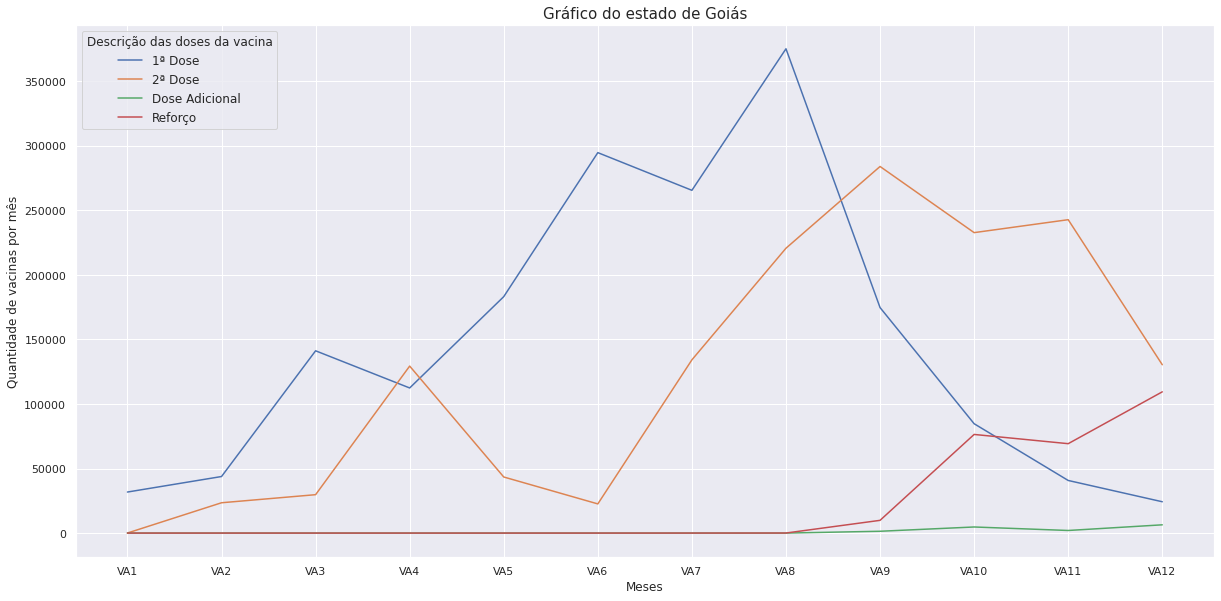

In [46]:
plt.figure(figsize=(20.4,9.8))
plt.title("Gráfico do estado de Goiás",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(GO_Count_Mes_Dose)
plt.legend(['1ª Dose', '2ª Dose', 'Dose Adicional', 'Reforço'], loc='upper left', title='Descrição das doses da vacina',fontsize=12)
plt.show()

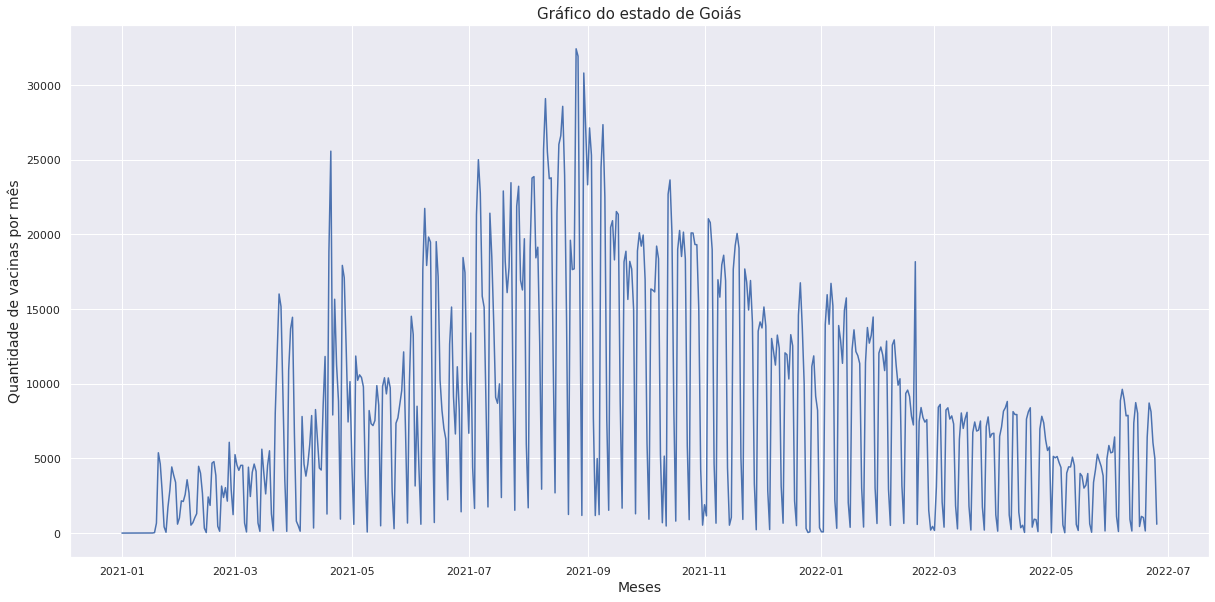

In [47]:
plt.figure(figsize=(20.4,9.8))
plt.title("Gráfico do estado de Goiás",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 14)
plt.xlabel('Meses',fontsize = 14)
plt.plot(GO_Count_Mes)
plt.show()

***> Gráficos com 1ª, 2ª e dose única do df_GO1.groupby***

In [48]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
GO_dataN = {
    'vacina_descricao_dose': ['1ª Dose','2ª Dose','Dose'],
    'Id_qtd_dose': ['1926585', '1669493','54263']
}
  
# criando outro DataFrame
GO_Vac = pd.DataFrame(GO_dataN)

In [49]:
GO_Vac['Id_qtd_dose'] = GO_Vac['Id_qtd_dose'].astype(int)

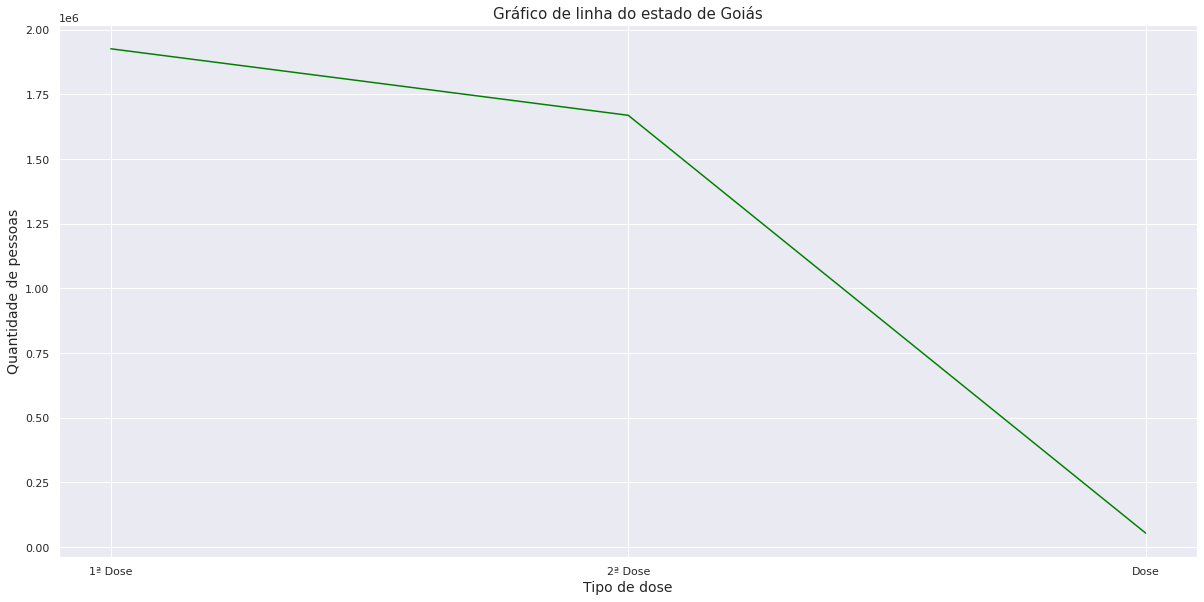

In [50]:
plt.figure(figsize=(20.4,9.8))
x = GO_Vac['vacina_descricao_dose']
y = GO_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Goiás",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='green')
plt.show()

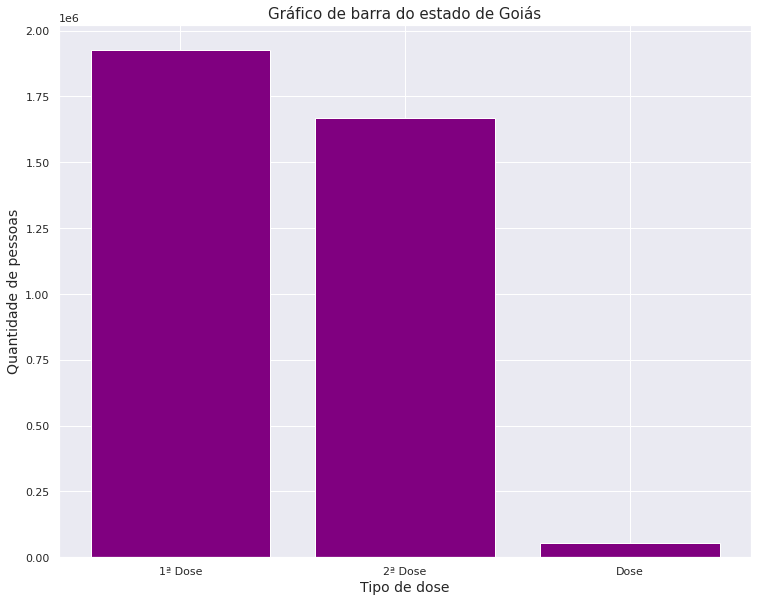

In [51]:
plt.figure(figsize=(12.4,9.8))
x = GO_Vac['vacina_descricao_dose']
y = GO_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Goiás",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'purple')
plt.show()



> ***Gráficos com todos os dados do df_GO1.groupby***



In [52]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
GO_dataN2 = {
    'vacina_descricao_dose': ['1ª Dose','1ª Dose Revacinação','2ª Dose','2ª Reforço','3ª Dose','3ª Reforço','Dose','Dose Adicional','Dose Inicial','Reforço'],
    'Id_qtd_dose': ['1926585', '1', '1669493', '144185','1','256','54263','58903','1','793509']
}
  
# criando outro DataFrame
GO_Todas_Vac = pd.DataFrame(GO_dataN2)

In [53]:
GO_Todas_Vac['Id_qtd_dose'] = GO_Todas_Vac['Id_qtd_dose'].astype(int)

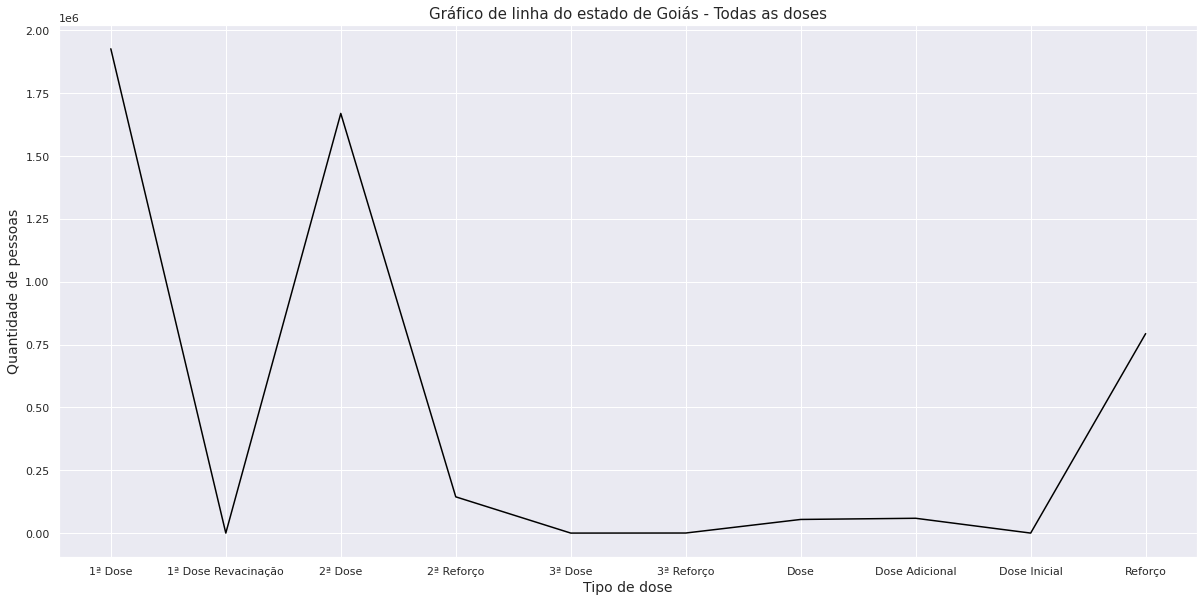

In [54]:
plt.figure(figsize=(20.4,9.8))
x = GO_Todas_Vac['vacina_descricao_dose']
y = GO_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Goiás - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='black')
plt.show()

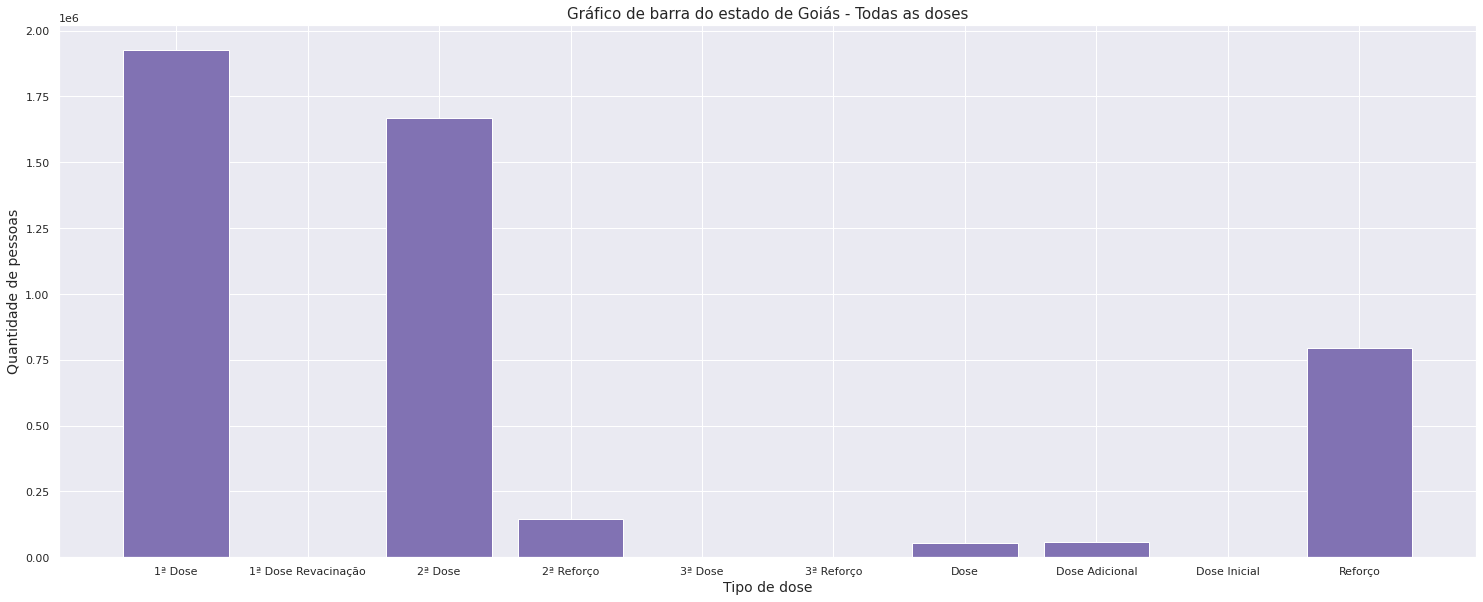

In [55]:
plt.figure(figsize=(25.4,9.8))
x = GO_Todas_Vac['vacina_descricao_dose']
y = GO_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Goiás - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'm')
plt.show()

# **Gráficos - Mato Grosso**

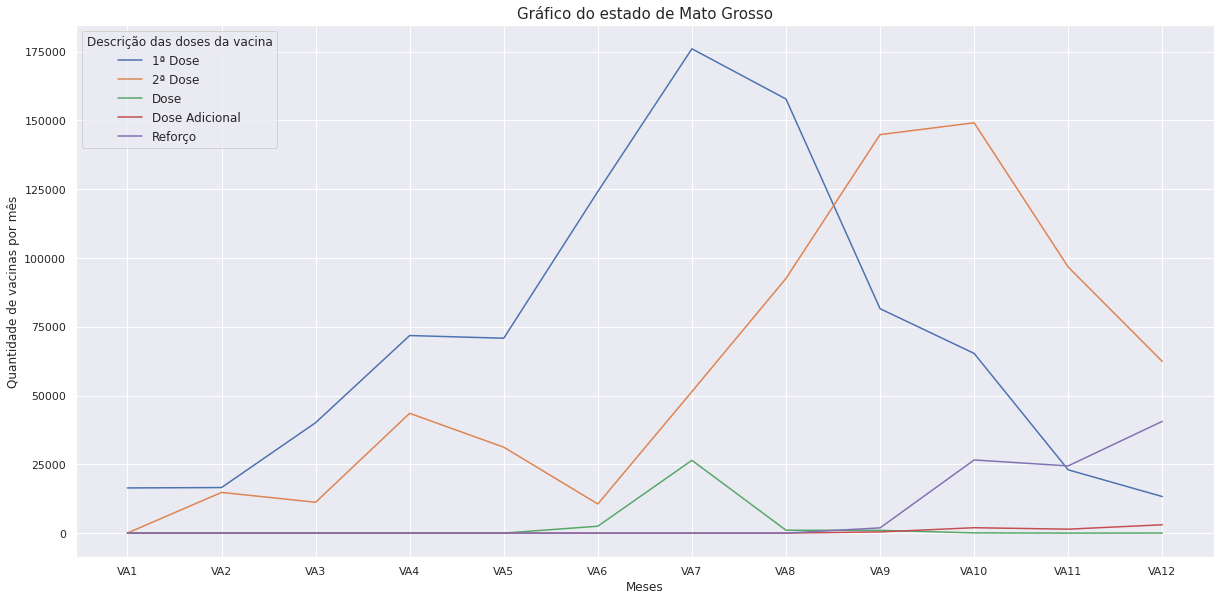

In [56]:
plt.figure(figsize=(20.4,9.8))
plt.title("Gráfico do estado de Mato Grosso",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(MT_Count_Mes_Dose)
plt.legend(['1ª Dose', '2ª Dose', 'Dose','Dose Adicional', 'Reforço'], loc='upper left', title='Descrição das doses da vacina',fontsize=12)
plt.show()

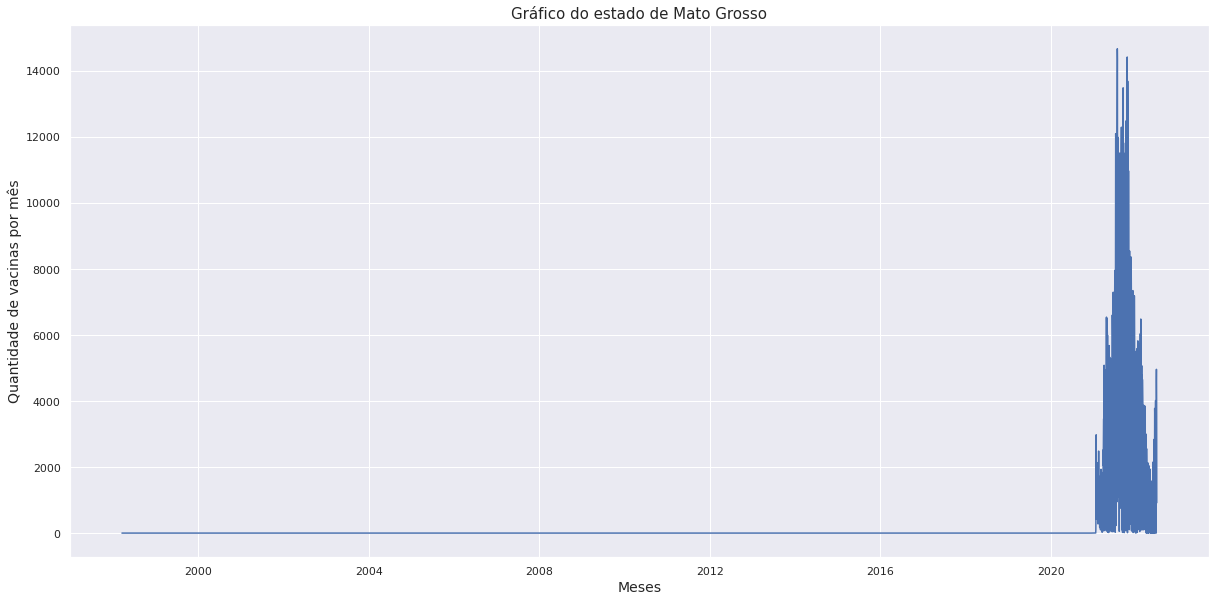

In [57]:
plt.figure(figsize=(20.4,9.8))
plt.title("Gráfico do estado de Mato Grosso",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 14)
plt.xlabel('Meses',fontsize = 14)
plt.plot(MT_Count_Mes)
plt.show()

***> Gráficos com 1ª, 2ª e dose única do df_MT1.groupby***

In [58]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
MT_dataN = {
    'vacina_descricao_dose': ['1ª Dose','2ª Dose','Dose'],
    'Id_qtd_dose': ['924849', '785579','31898']
}
  
# criando outro DataFrame
MT_Vac = pd.DataFrame(MT_dataN)

In [59]:
MT_Vac['Id_qtd_dose'] = MT_Vac['Id_qtd_dose'].astype(int)

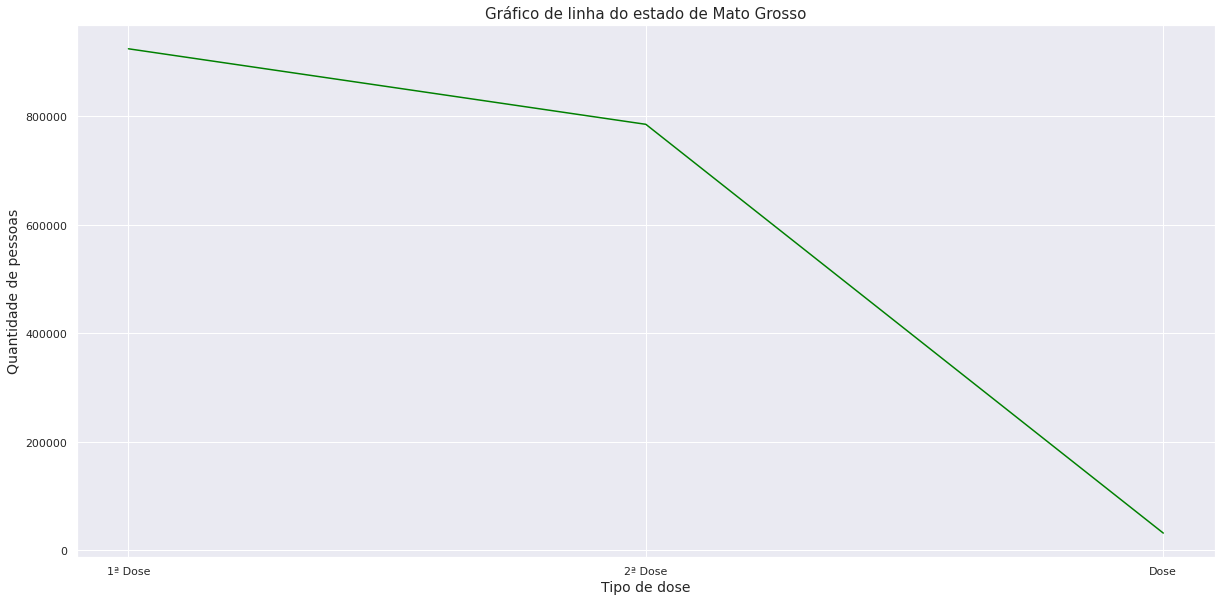

In [60]:
plt.figure(figsize=(20.4,9.8))
x = MT_Vac['vacina_descricao_dose']
y = MT_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Mato Grosso",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='green')
plt.show()

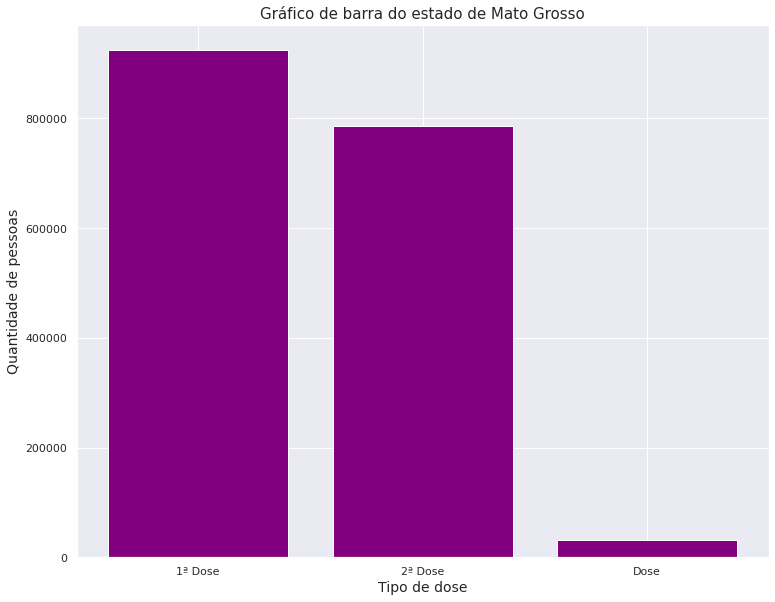

In [61]:
plt.figure(figsize=(12.4,9.8))
x = MT_Vac['vacina_descricao_dose']
y = MT_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Mato Grosso",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'purple')
plt.show()



> ***Gráficos com todos os dados do df_MT1.groupby***



In [62]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
MT_dataN2 = {
    'vacina_descricao_dose': ['1ª Dose','1ª Dose Revacinação','1º Reforço','2ª Dose','2ª Dose Revacinação ','2º Reforço','3ª Dose','3º Reforço','4ª Dose','Dose','Dose Adicional','Dose Inicial','Reforço','Única'],
    'Id_qtd_dose': ['924849', '67', '25','785579','3','39965','1631','214','73','31898','27973','1','309999','64']
}
  
# criando outro DataFrame
MT_Todas_Vac = pd.DataFrame(MT_dataN2)

In [63]:
MT_Todas_Vac['Id_qtd_dose'] = MT_Todas_Vac['Id_qtd_dose'].astype(int)

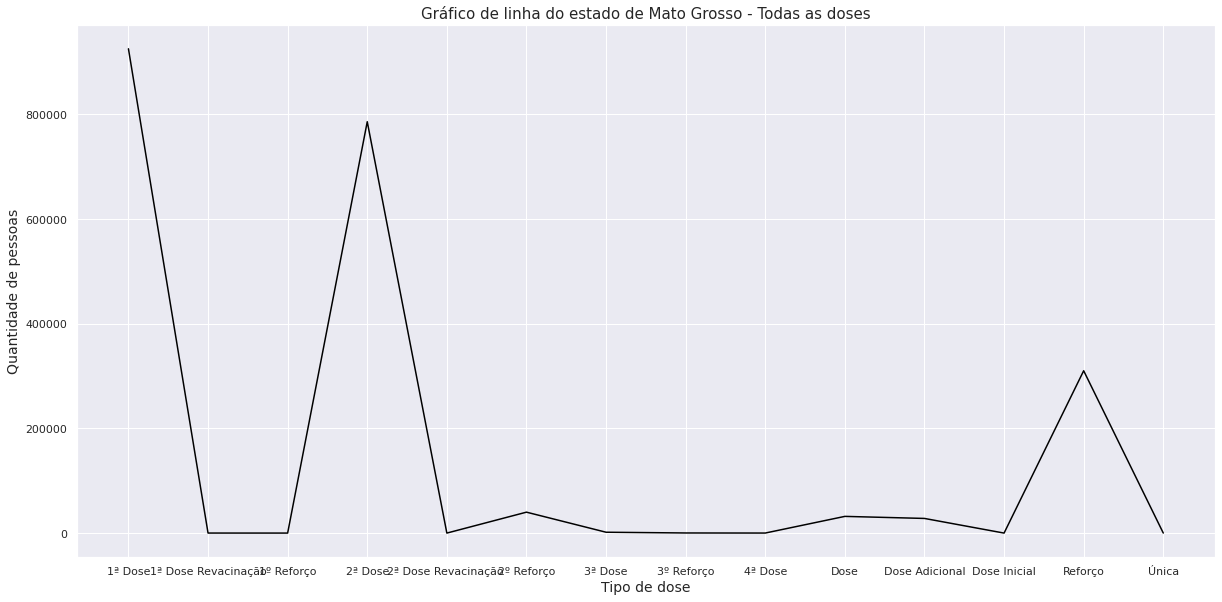

In [64]:
plt.figure(figsize=(20.4,9.8))
x = MT_Todas_Vac['vacina_descricao_dose']
y = MT_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Mato Grosso - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='black')
plt.show()

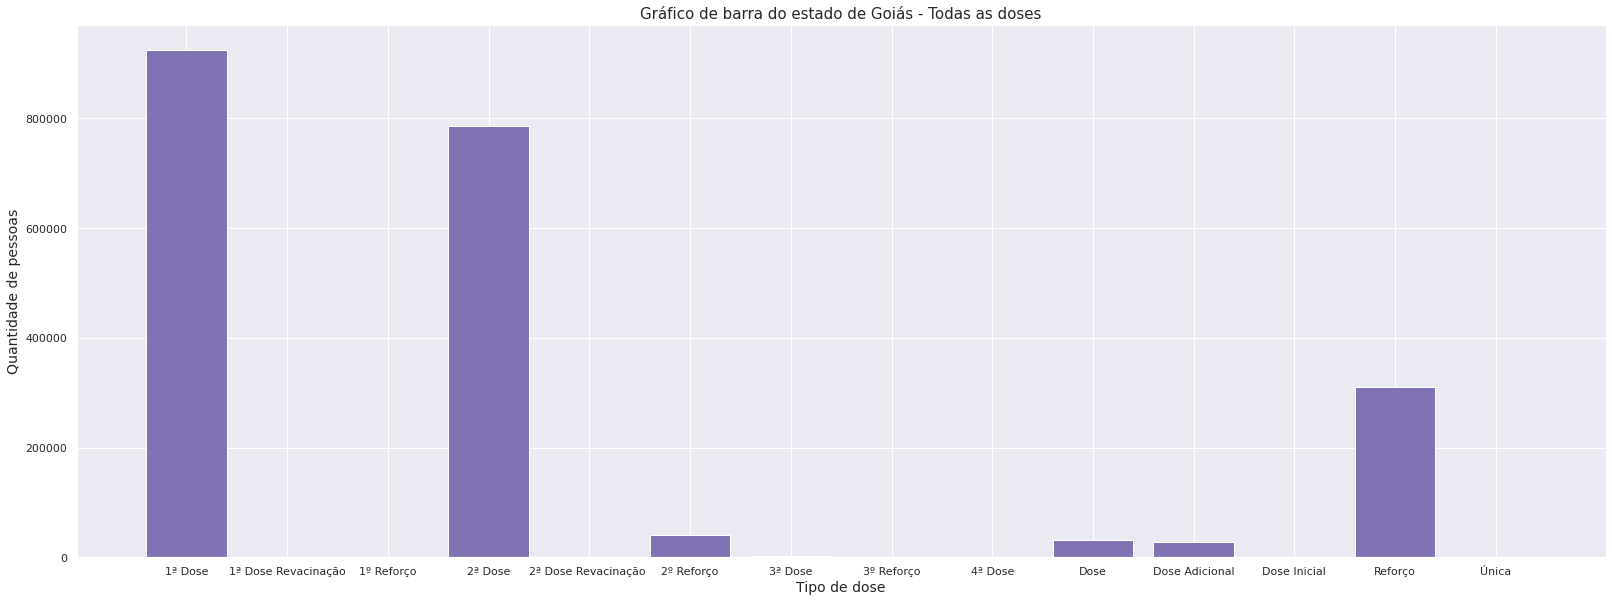

In [65]:
plt.figure(figsize=(27.4,9.8))
x = MT_Todas_Vac['vacina_descricao_dose']
y = MT_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Goiás - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'm')
plt.show()